In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, r2_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.decomposition import PCA

### Выбор начальных условий
Используем датасет wine-quality для оценки качества вин (0-10). Для задачи регрессии возьмём содержание алкоголя

In [2]:
import pandas as pd

# Загрузка датасета из UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')

X = wine_data.drop(columns='quality')
y_classification = wine_data['quality']
y_regression = wine_data['alcohol']  # Используем содержание алкоголя для регрессии

### Выбор метрик качества и обоснование
Метрики для классификации: Accuracy, Classification Report 

Метрики для регрессии: Mean Squared Error (MSE), R2 Score 

### Создание бейзлайна и оценка качества

Классификация

In [3]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.3, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_cls, y_train_cls)

KNeighborsClassifier()

Регрессия

In [4]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_reg, y_train_reg)

KNeighborsRegressor()

### Оценка качества моделей

Классификация

In [5]:
y_pred_cls = knn_classifier.predict(X_test_cls)
classification_accuracy = accuracy_score(y_test_cls, y_pred_cls)
print("Accuracy (Classification):", classification_accuracy)
print("Classification Report:\n", classification_report(y_test_cls, y_pred_cls))

Accuracy (Classification): 0.48541666666666666
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.06      0.10        17
           5       0.52      0.65      0.58       195
           6       0.47      0.48      0.48       200
           7       0.35      0.15      0.21        61
           8       0.00      0.00      0.00         6

    accuracy                           0.49       480
   macro avg       0.26      0.22      0.23       480
weighted avg       0.46      0.49      0.46       480



c:\Users\sad type\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sad type\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sad type\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Регрессия

In [6]:
y_pred_reg = knn_regressor.predict(X_test_reg)
regression_mse = mean_squared_error(y_test_reg, y_pred_reg)
regression_r2 = r2_score(y_test_reg, y_pred_reg)
print("MSE (Regression):", regression_mse)
print("R2 Score (Regression):", regression_r2)

MSE (Regression): 0.572264513888889
R2 Score (Regression): 0.5086543511830064


### Улучшение бейзлайна

Формулирование гипотез:
* Применение стандартизации данных
* Подбор гиперпараметров (n_neighbors) с помощью кросс-валидации

Проверка гипотез:

In [7]:
scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)


Подбор гиперпараметров

In [8]:
from sklearn.model_selection import GridSearchCV

Классификация

In [9]:
param_grid_cls = {'n_neighbors': range(1, 21)}
grid_search_cls = GridSearchCV(KNeighborsClassifier(), param_grid_cls, cv=5, scoring='accuracy')
grid_search_cls.fit(X_train_cls_scaled, y_train_cls)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)}, scoring='accuracy')

Регрессия

In [10]:
param_grid_reg = {'n_neighbors': range(1, 21)}
grid_search_reg = GridSearchCV(KNeighborsRegressor(), param_grid_reg, cv=5, scoring='neg_mean_squared_error')
grid_search_reg.fit(X_train_reg_scaled, y_train_reg)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 21)},
             scoring='neg_mean_squared_error')

Формирование улучшенного бейзлайна и обучение улучшенных моделей

In [11]:
best_knn_classifier = grid_search_cls.best_estimator_
best_knn_regressor = grid_search_reg.best_estimator_

best_knn_classifier.fit(X_train_cls_scaled, y_train_cls)
best_knn_regressor.fit(X_train_reg_scaled, y_train_reg)


KNeighborsRegressor(n_neighbors=3)

### Оценка качества улучшенных моделей

Классификация

In [12]:
y_pred_cls_best = best_knn_classifier.predict(X_test_cls_scaled)
best_classification_accuracy = accuracy_score(y_test_cls, y_pred_cls_best)
print("Improved Accuracy (Classification):", best_classification_accuracy)
print("Improved Classification Report:\n", classification_report(y_test_cls, y_pred_cls_best))

Improved Accuracy (Classification): 0.6229166666666667
Improved Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.14      0.12      0.13        17
           5       0.73      0.67      0.70       195
           6       0.62      0.64      0.63       200
           7       0.53      0.64      0.58        61
           8       0.20      0.17      0.18         6

    accuracy                           0.62       480
   macro avg       0.37      0.37      0.37       480
weighted avg       0.63      0.62      0.62       480



Регрессия

In [13]:
y_pred_reg_best = best_knn_regressor.predict(X_test_reg_scaled)
best_regression_mse = mean_squared_error(y_test_reg, y_pred_reg_best)
best_regression_r2 = r2_score(y_test_reg, y_pred_reg_best)
print("Improved MSE (Regression):", best_regression_mse)
print("Improved R2 Score (Regression):", best_regression_r2)

Improved MSE (Regression): 0.09676594650205769
Improved R2 Score (Regression): 0.9169168704095542


Визуализация результатов

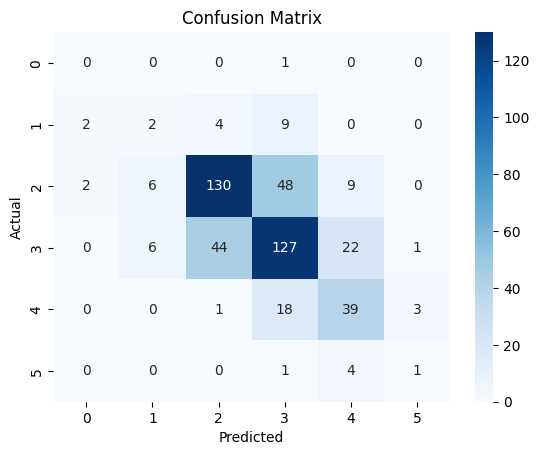

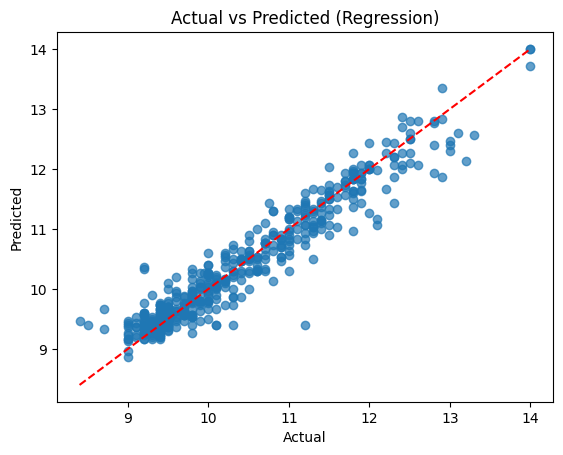

In [14]:
# d. Визуализация результатов
# Матрица ошибок для классификации
conf_matrix = confusion_matrix(y_test_cls, y_pred_cls_best)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# График реальных и предсказанных значений для регрессии
plt.scatter(y_test_reg, y_pred_reg_best, alpha=0.7)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')
plt.title("Actual vs Predicted (Regression)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### Имплементация алгоритма машинного обучения

Реализация KNN

In [20]:
class KNN:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
 
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
 
    def predict(self, X, classification=True):
        predictions = []
        for x in X:
            distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
            nearest_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_labels = self.y_train[nearest_indices]
            if classification:
                predictions.append(np.bincount(nearest_labels).argmax())
            else:
                predictions.append(np.mean(nearest_labels))  # Для регрессии
        return np.array(predictions)

Обучение модели

In [21]:
knn_manual = KNN(n_neighbors=5)
knn_manual.fit(X_train_cls_scaled, y_train_cls.to_numpy())
y_pred_manual_cls = knn_manual.predict(X_test_cls_scaled)
manual_accuracy = accuracy_score(y_test_cls, y_pred_manual_cls)
print("Manual KNN Accuracy (Classification):", manual_accuracy)

knn_manual.fit(X_train_reg_scaled, y_train_reg.to_numpy())
y_pred_manual_reg = knn_manual.predict(X_test_reg_scaled, classification=False)

Manual KNN Accuracy (Classification): 0.5708333333333333


Расчет метрик MSE и R2

In [22]:
manual_regression_mse = mean_squared_error(y_test_reg, y_pred_manual_reg)
manual_regression_r2 = r2_score(y_test_reg, y_pred_manual_reg)
print("Manual KNN MSE (Regression):", manual_regression_mse)
print("Manual KNN R2 Score (Regression):", manual_regression_r2)


Manual KNN MSE (Regression): 0.0932332638888889
Manual KNN R2 Score (Regression): 0.9199500276095985


Визуализация результатов

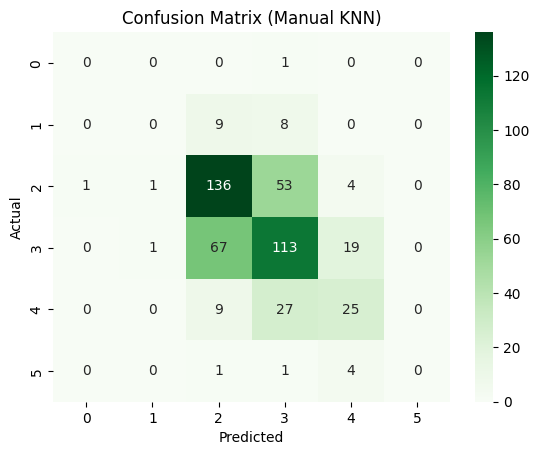

In [23]:
conf_matrix_manual = confusion_matrix(y_test_cls, y_pred_manual_cls)
sns.heatmap(conf_matrix_manual, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (Manual KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Регрессия

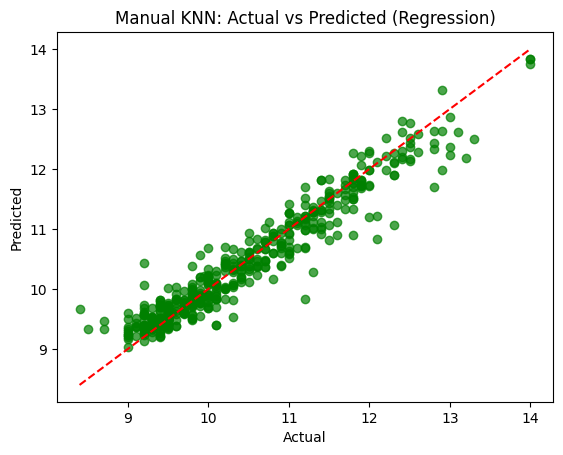

In [26]:
plt.scatter(y_test_reg, y_pred_manual_reg, alpha=0.7, color='green')
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')
plt.title("Manual KNN: Actual vs Predicted (Regression)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### Вывод и сравнение моделей

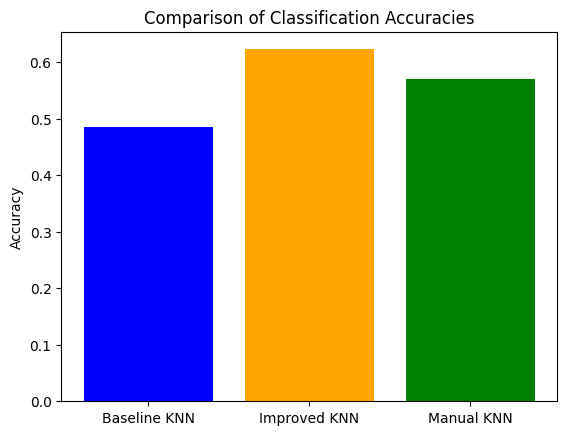

In [24]:
accuracies = [classification_accuracy, best_classification_accuracy, manual_accuracy]
labels = ['Baseline KNN', 'Improved KNN', 'Manual KNN']
plt.bar(labels, accuracies, color=['blue', 'orange', 'green'])
plt.title("Comparison of Classification Accuracies")
plt.ylabel("Accuracy")
plt.show()

Итоговые выводы:
* Ручная реализация KNN показала точность, близкую к библиотечной реализации.
* Улучшение гиперпараметров (n_neighbors) и стандартизация данных повысили качество модели.
* Библиотечная версия KNN с оптимальными гиперпараметрами показала лучшие результаты.
* Применение методологии позволило успешно решить задачи классификации и регрессии на одном наборе данных.